<a href="https://colab.research.google.com/github/YujiSue/Lecture/blob/master/TWMU_2020_s1_Lecture_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIによる画像識別  
## まずは実際にAIの能力を確かめてみます  
1. 適当に画像をダウンロード  
2. その画像が何の画像かAIに聞いてみる
3. AIが予想確率をつけて答えてくれるので、結果を表示  
  
## この流れを一通り見ていきましょう


In [0]:
# 1. 画像をダウンロード

#ネット上から画像をダウンロードするのに必要なPythonプログラムを読み込みます
import requests

#画像表示に必要なPythonプログラムを読み込みます
from IPython.display import Image, display_jpeg, display_png, display_pdf

#画像をダウンロードします
# requests.get(画像のURL)を実行して、responseの中に結果を代入します
画像のURL1 = 'https://d1f5hsy4d47upe.cloudfront.net/d1/d17d3c7acf2d4444eee24cdd47200d5f_t.jpeg'
response = requests.get(画像のURL1)

# 画像の名前を決めます
画像名１ = 'dog.jpeg'

#（空の）画像ファイルを用意します
# open('好きなファイル名', 'wb')でファイルを作成し、そのファイルを imgfile_1 に代入します
画像ファイル１ = open(画像名１, 'wb')

# ダウンロードした画像をファイルに書き込みます
画像ファイル１.write(response.content)

#画像を表示します
display_jpeg(Image(画像名１))

# ※ダウンロードしたファイルがjpegでない(png)場合は、
# display_png(Image('画像ファイル名'))
# とします

# 自分の好きな画像をダウンロードしたい場合は、
# 上のコードを見ながら
# 画像のURL２ = '好きな画像のアドレス'
# response = requests.get('画像のURL２')
# 画像名２ = '好きな名前.jpg'
# 画像ファイル２ = open(image_name2, 'wb')
# 画像ファイル２.write(response.content)
# ...のようにしましょう

# ※注意：画像のURLは必ず画像本体を示すアドレスでなくてはいけません。
# 例えばTwitterなどで写真が見れる以下のようなアドレスは画像だけのアドレスではありません
# https://twitter.com/SHARP_JP/status/717912259607994370/photo/1


- 世の中には、すでにディープラーニングを簡単に扱えるようにしたプログラム群が存在します。  
- 有名どころは [Tensorflow](https://www.tensorflow.org/), [keras](https://keras.io/ja/),[chainer](https://chainer.org/)あたりです  
- Tensorflowは、比較的早い時期にgoogleが発表したもので、他のプログラムの基盤に使われていたりします  
- 今回はkerasを使います

In [0]:
# 2.画像が何の画像かAIに聞いてみる

# 必要なプログラム群を読み込んでいきます
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# すでに研究者が学習させた人工知能を読み込みます
テストAI = ResNet50(weights='imagenet')

# さきほどダウンロードした画像をあらためて読み込みます
画像 = image.load_img(画像名１, target_size=(224, 224))

# 画像データをAIが認識できる形に変換・前処理します
変換画像 = image.img_to_array(画像)
変換画像 = np.expand_dims(変換画像, axis=0)
変換画像 = preprocess_input(変換画像)
# AIに予測させて結果を取得します
予測 = テストAI.predict(変換画像)
結果 = decode_predictions(予測, top=3)[0]

# 3.結果を表示
display_jpeg(Image(image_name1))
print('第１候補：', 結果[0][1], '(予想確率：', 結果[0][2]*100, '％）')
print('第２候補：', 結果[1][1], '(予想確率：', 結果[1][2]*100, '％）')
print('第３候補：', 結果[2][1], '(予想確率：', 結果[2][2]*100, '％）')

イヌ科には詳しくないですが、間違いなくディンゴではない...  
前回の「りんな」しかり、最新のAIといっても意外とこんなもんです。  

# Pythonの画像処理
## もう少し練習モード

- 人間の視覚情報処理と同じように色や形状を抽出  
- 抽出した要素を組み合わせて、特徴パターンを学習
- 特徴パターンをもとに、物体検出
  
せっかくなので、この辺の流れをPythonで実行してみましょう。  
今度は[OpenCV](https://opencv.org/)というプログラム群を使います。

In [0]:
# 必要なファイルをダウンロード
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg -O MonaLisa.jpg
!wget http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/_static/opencv-logo-white.png -O OpenCV.png
!wget https://lh3.googleusercontent.com/proxy/9aSy2jrj-61nTCeAGtqxNMRaq_LsCVbLd2D9MFAGw8VE9IYp64wvpJUYiEeu8mfi9JDvRmBMXJN2Mf_tx7o5I6NGrDa8TKBTArF4jg4EqIrcKx0EpxQJgnyM35iQoe2GTw -O Oden.png
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

# OpenCVなどの導入
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image, clear_output

# オブジェクト外（グローバル）に画像表示用関数を作る
# 特定のオブジェクトに縛られない
def showCVImage(mat):
  decoded_bytes = cv2.imencode('.jpg', mat)[1].tobytes()
  display(Image(data=decoded_bytes))

## 色の抽出


元の画像


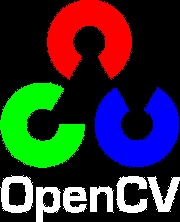



赤だけ


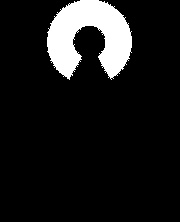

In [48]:
 # 画像読み込み
アイコン = cv2.imread('OpenCV.png')
# 色の抽出
print('元の画像')
showCVImage(アイコン)
print('\n')
#赤色抽出
下限色 = np.array([0, 0, 200]) # 青, 緑, 赤の順で指定
上限色 = np.array([50, 50, 255])
赤抽出 = cv2.inRange(アイコン, 下限色, 上限色)
print('赤だけ')
showCVImage(赤抽出)

## 形状の抽出


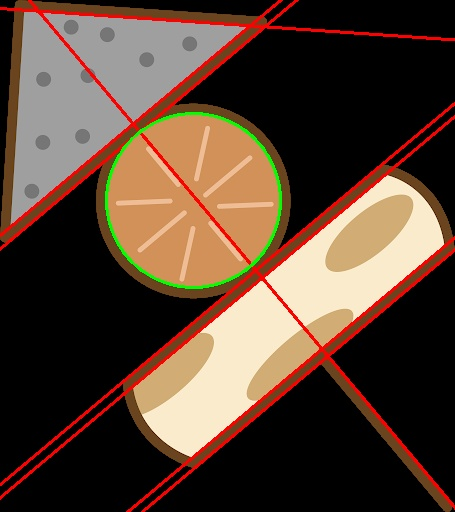

In [54]:
# 画像の読み込み
おでん = cv2.imread('Oden.png')

# 直線を検出
おでんグレー = cv2.cvtColor(おでん,cv2.COLOR_BGR2GRAY)
縁 = cv2.Canny(おでんグレー,50,150,apertureSize = 3)
直線リスト = cv2.HoughLines(縁,1,np.pi/180,200)

# 円形を検出
円リスト = cv2.HoughCircles(おでんグレー,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=100,minRadius=10)

# 検出した個々の直線について
for 線 in 直線リスト:
  for rho,theta in 線:
    # ベクトル計算と延長
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    # 検出した線を赤く引く
    cv2.line(おでん,(x1,y1),(x2,y2),(0,0,255),2)

# 検出した個々の円について
for 円 in 円リスト[0]:
    # 検出した円を緑で縁取り
    cv2.circle(おでん,(円[0],円[1]),円[2],(0,255,0),2)

# 表示
showCVImage(おでん)

## 抽出した要素を組み合わせて、特徴パターンを学習
## 特徴パターンをもとに、物体検出
画像の中の特定の要素を抽出した結果、様々な物体ごとの特徴的なパターンを拾うことができます。  
動物の脳には、顔に反応しやすい神経があります。  
試しに、ヒトの顔や顔のパーツを検出してみましょう。


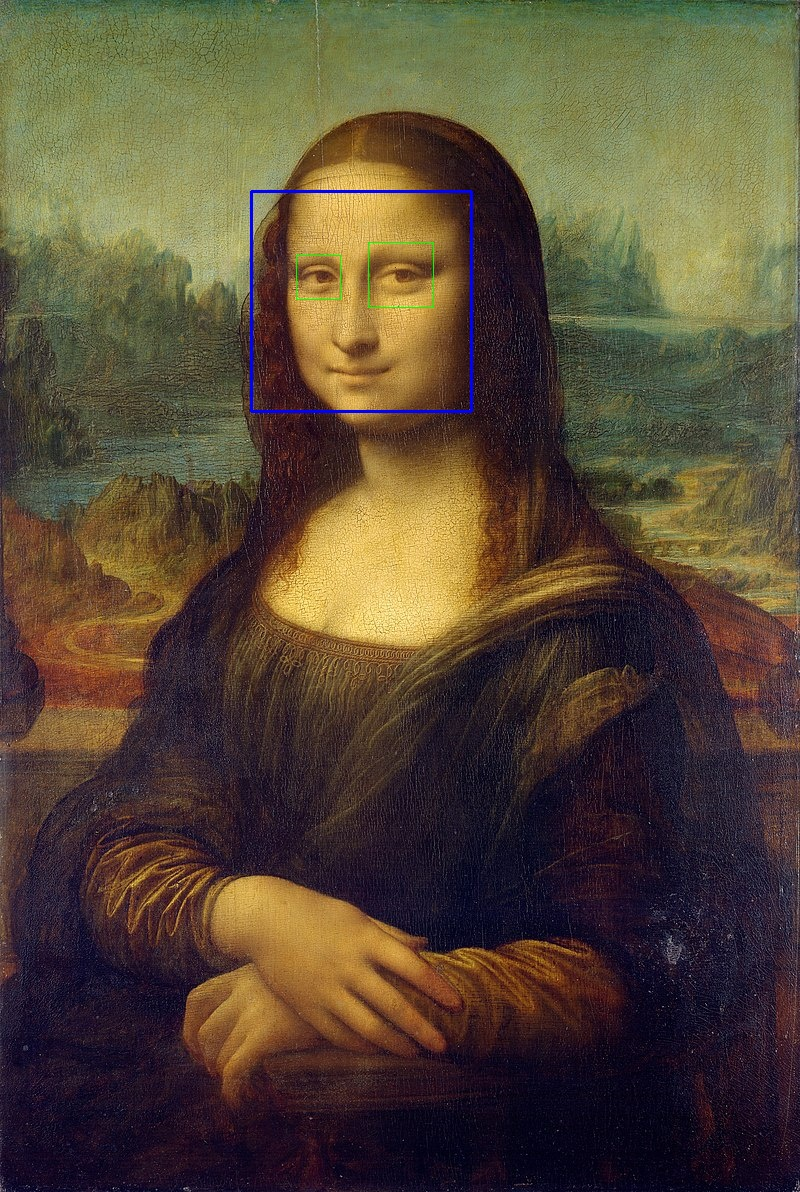

In [19]:
# 特徴分類器の読み込み
顔検出器 = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
目検出器 = cv2.CascadeClassifier('haarcascade_eye.xml')

# テスト用画像の読み込み
モナリザさん = cv2.imread('MonaLisa.jpg')
表示用画像 = cv2.imread('MonaLisa.jpg')
# 計算を簡略化するためにモノクロ化
モナリザさんグレー = cv2.cvtColor(モナリザさん, cv2.COLOR_BGR2GRAY)

# 顔を検出
顔 = 顔検出器.detectMultiScale(モナリザさんグレー)
# 検出された全員の顔について
for (x,y,w,h) in 顔:
    # 検出した顔を青い四角で囲む
    cv2.rectangle(表示用画像,(x,y),(x+w,y+h),(255,0,0),2)
    # 顔画像（グレースケール）
    顔グレー = モナリザさんグレー[y:y+h, x:x+w]
    # 顔画像（カラースケール）
    顔カラー = 表示用画像[y:y+h, x:x+w]
    # 顔の中から目を検出
    目位置 = []
    目 = 目検出器.detectMultiScale(顔グレー, scaleFactor=1.07, minNeighbors=1)
    # ある顔の中から検出された全ての目について
    for (ex,ey,ew,eh) in 目:
        目位置.append([ex,ey,ew,eh])
        # 検出した目を緑の四角で囲む
        cv2.rectangle(顔カラー,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        
showCVImage(表示用画像)

# それでは本題にいきましょう
ちょっと長くなったので[２つ目のファイル]()にいきます